# Visualizando Errores

Para cuantificar cualquier experimento científico, la precisión en la medida de los errores es casi tan importante, si no más importante, que la precisión de la medida en sí.
Por ejemplo, imaginemos que estamos usando algunas observaciones astrofísicas para estimar la Constante de Hubble, la medida local de la tasa de expansión del Universo.
En la literatura actual, se sugiere un valor de alrededor de 71 (km/s)/Mpc, y obtenemos un valor de 74 (km/s)/Mpc con nuestro método. ¿Son coherentes los valores? La única respuesta correcta, dada esta información, es la siguiente: "No hay forma de saberlo".

Supongamos que aumentamos esta información con las incertidumbres reportadas: la literatura actual sugiere un valor de en torno a 71 $\pm$ 2.5 (km/s)/Mpc, mientras que nuestro método obtenemos un valor de 74 $\pm$ 5 (km / s) / Mpc. Ahora, ¿los valores son consistentes? Esa es una pregunta que puede responderse cuantitativamente.

En la visualización de datos y resultados, mostrar estos errores de manera efectiva puede hacer que un gráfico transmita información mucho más completa.


Como en los notebooks anteriores, comenzamos 

## Barras de Error básicas

Una barra de error básica puede ser creada con una simple llamada a una función de Matplotlib:

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

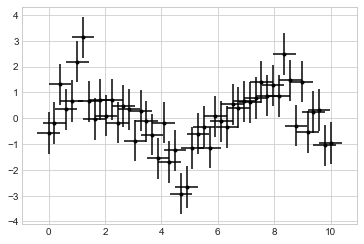

In [34]:
x = np.linspace(0, 10, 50)
dy = 0.8
dx = 0.4
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, xerr=dx, fmt='.k');

Aquí, el parámetro `` fmt `` es un código de formato que controla la apariencia de líneas y puntos, y tiene la misma sintaxis que la abreviatura utilizada en `` plt.plot `` (lo hemos visto en el notebook anterior).

Además de estas opciones básicas, la función `` errorbar `` tiene muchas otras opciones para ajustar las salidas.
Con estas opciones adicionales, podemos personalizar fácilmente la estética del gráfico de barra de error.
Normalmente, querremos darle mayor importancia a los puntos, por lo que podríamos hacer que las barras de error fuesen más tenues que los puntos:

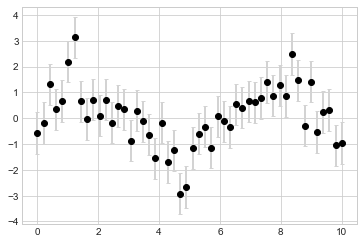

In [39]:
plt.errorbar(x, y, yerr=dy, fmt='o', color='black',
             ecolor='lightgray', elinewidth=2, capsize=2);

Además de estas opciones, también podemos especificar barras de error horizontales (`` xerr ``), barras de error de un solo lado y muchas otras variantes.
Para obtener más información sobre las opciones disponibles, podemos consultar el docstring de `` plt.errorbar ``.

# Densidad y Contornos

A veces es útil mostrar datos tridimensionales en dos dimensiones utilizando contornos o regiones codificadas por colores.
Hay tres funciones de Matplotlib que pueden ser útiles para esto: `` plt.contour ``, que nos permitirá crear gráficos de contorno; `` plt.contourf `` para crear gráficos de contorno rellenos, y `` plt.imshow `` con la que podremos mostrar imágenes.

A continuación, analizaremos varios ejemplos de su uso, comenzando por la configuración del notebook para graficar e importar las funciones que usaremos:

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

## Visualizando funciones tridimensionales

Comenzaremos viendo los gráficos de controno con la función $z = f(x, y)$, siendo $f$ lo que mostramos a continuación:

In [42]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

Se puede crear un gráfico de contorno con la función `` plt.contour ``.
Para ello, necesitaremos tres argumentos: una cuadrícula de valores `x`, otra cuadrícula de valores `y`, y otra para `z`.
Los valores `x` e `y` representan posiciones en el gráfico, y los valores `z` estarán representados por los niveles de contorno.

Quizás la forma más sencilla de preparar dichos datos es usar la función `` np.meshgrid ``, que crea cuadrículas bidimensionales a partir de matrices unidimensionales:

In [47]:
Y

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.10204082, 0.10204082, 0.10204082, ..., 0.10204082, 0.10204082,
        0.10204082],
       [0.20408163, 0.20408163, 0.20408163, ..., 0.20408163, 0.20408163,
        0.20408163],
       ...,
       [4.79591837, 4.79591837, 4.79591837, ..., 4.79591837, 4.79591837,
        4.79591837],
       [4.89795918, 4.89795918, 4.89795918, ..., 4.89795918, 4.89795918,
        4.89795918],
       [5.        , 5.        , 5.        , ..., 5.        , 5.        ,
        5.        ]])

In [43]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

In [49]:
f(X, Y)

array([[-0.83907153, -0.83470697, -0.8216586 , ...,  0.8956708 ,
         0.68617261,  0.41940746],
       [-0.83907153, -0.82902677, -0.8103873 , ...,  0.92522407,
         0.75321348,  0.52508175],
       [-0.83907153, -0.82325668, -0.79876457, ...,  0.96427357,
         0.84172689,  0.66446403],
       ...,
       [-0.83907153, -0.48233077, -0.01646558, ...,  0.96449925,
         0.75196531,  0.41982581],
       [-0.83907153, -0.47324558,  0.00392612, ...,  0.92542163,
         0.68540362,  0.37440839],
       [-0.83907153, -0.46410908,  0.02431613, ...,  0.89579384,
         0.65690314,  0.40107702]])

Ahora veamos esto con un gráfico de contorno de línea estándar:

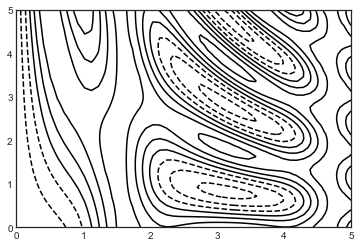

In [50]:
plt.contour(x, y, Z, colors='black');

Date cuenta que, por defecto, cuando se utiliza un solo color, los valores negativos se representan con líneas discontinuas, y los valores positivos, con líneas continuas.
Alternativamente, las líneas se pueden codificar por colores especificando un mapa de colores con el argumento `` cmap ``.

A continuación, además de cambiar los colores para la representación, aumentaremos el número de líneas que se dibujan, 20 intervalos igualmente espaciados dentro del rango de datos:

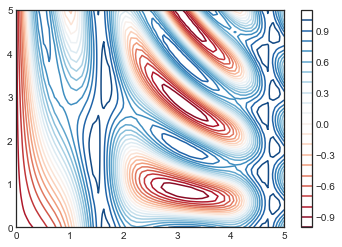

In [71]:
plt.contour(X, Y, Z, levels = 20, cmap=plt.cm.RdBu);
plt.colorbar();


In [63]:
help(plt.cm)

Help on module matplotlib.cm in matplotlib:

NAME
    matplotlib.cm - Builtin colormaps, colormap handling utilities, and the `ScalarMappable` mixin.

DESCRIPTION
    .. seealso::
    
      :doc:`/gallery/color/colormap_reference` for a list of builtin colormaps.
    
      :doc:`/tutorials/colors/colormap-manipulation` for examples of how to
      make colormaps.
    
      :doc:`/tutorials/colors/colormaps` an in-depth discussion of
      choosing colormaps.
    
      :doc:`/tutorials/colors/colormapnorms` for more details about data
      normalization.

CLASSES
    builtins.object
        ScalarMappable
    
    class ScalarMappable(builtins.object)
     |  ScalarMappable(norm=None, cmap=None)
     |  
     |  This is a mixin class to support scalar data to RGBA mapping.
     |  The ScalarMappable makes use of data normalization before returning
     |  RGBA colors from the given colormap.
     |  
     |  Methods defined here:
     |  
     |  __init__(self, norm=None, cmap=None

Hemos elegido el mapa de color ``RdGy`` (*Red-Gray*), el cual es una gran opción para datos centrados.

Matplotlib tiene un gran rango de mapas de colores disponibles, los cuales podemos encontrar fácilmente a través del buscador del notebook haciendo uso del autocompletado (pulsando ``<TAB>`` tras escribir el módulo ``plt.cm``):

```
plt.cm.<TAB>
```

Nuestro gráfico se va poniendo cada vez más guapo, pero sigue habiendo puntos de mejora, como los espacios entre líneas, que podrían distraer un poco.

Podemos cambiar esto cambiando la representación por una de contorno con relleno, usando la función ``plt.contourf()`` (con una ``f`` al final), que sigue prácticamente la misma sintaxis que ``plt.contour()``.

Además, añadiremos el comando ``plt.colorbar()``, que creará de forma automática un eje adicional con la información del color del propio gráfico.

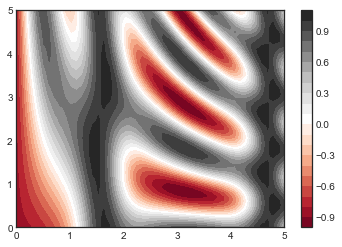

In [74]:
plt.contourf(X, Y, Z, levels=20, cmap='RdGy')
plt.colorbar();

La barra de color deja bien claro que las zonas negras son "picos" y las rojas, "valles".


Un problema potencial de esta representación es que se ve "pixelado", es decir, los cambios entre color se ven claramente discretos en lugar de continuos, lo que no siempre es lo que se desea.

Esto podría remediarse estableciendo el número de contornos en un número muy alto, pero esto daría como resultado un gráfico ineficiente: Matplotlib debe representar un nuevo polígono para cada paso en el nivel.

Una mejor manera de manejar esto es usar la función `` plt.imshow () ``, que interpreta una cuadrícula bidimensional de datos como una imagen. Veámoslo con un ejemplo

El siguiente código lo muestra:

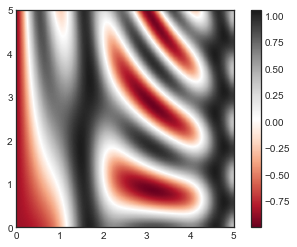

In [87]:
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy', interpolation='gaussian')
plt.colorbar();

Sin embargo, existen algunos errores potenciales con ``imshow()``:

- ``plt.imshow()`` no acepta cuadrículas de *x* e *y*, así que debemos especificarle a mano el parámetro ``extent``([*xmin*, *xmax*, *ymin*, *ymax*]) de la imagen de la representación.
- ``plt.imshow()`` por defecto, sigue el estándar de la definición de matriz de imágenes, donde el origen está en la parte superior izquierda, no en la parte inferior izquierda como en la mayoría de los gráficos de contorno. Esto debe cambiarse cuando se muestran datos cuadriculados.

Por último, a veces puede resultar útil combinar gráficos de contorno y gráficos de imagen.
Por ejemplo, aquí usaremos una imagen de fondo parcialmente transparente (con transparencia establecida a través del parámetro `alfa`) y trazaremos contornos con etiquetas en los propios contornos (usando la función `` plt.clabel ()``):

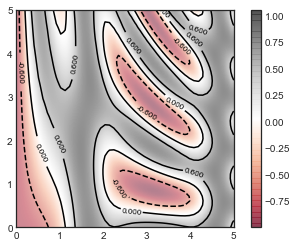

In [96]:
contours = plt.contour(X, Y, Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy', alpha=0.5, interpolation='gaussian')
plt.colorbar();

Finalmente, la combinación de estas tres funciones (``plt.contour ``, `` plt.contourf `` y `` plt.imshow `` ) nos brinda posibilidades casi ilimitadas para mostrar este tipo de datos tridimensionales dentro de un gráfico bidimensional.
Para obtener más información sobre las opciones disponibles en estas funciones, podemos consultar sus docstrings. A veces resulta útil combinar gráficos de contorno y gráficos de imagen.

## Ejercicio

En este ejercicio practicaremos lo básico de las representacoines de errores:
1. Configura el estilo de ``plt`` del notebook para que muestre la cuadrícula (grid). Prueba a crearte una figura en blanco (o con cualquier cosa sencilla) para ver si funciona
2. Lee las medidas del dataframe "desinteg_part.csv", que tiene datos sobre diferentes experimentos de la desintegración de las partículas en función de su radio (en nm), para los que te dicen que el error en el eje Y es de 0.245
3. Representa los datos con un ``errorbar`` donde los marcadores sean * y el color de la representación sea verde.
4. Crea otra gráfica donde se le dé mayor importancia a los datos, de modo que se muestren con puntos como markers, de color azul (o cyan), donde la representación del error sea de un color azul más tenue y se utilice un capsize de 2

NOTA: Puede que el csv tenga un separador distinto al que utilizamos por defecto

In [109]:
plt.style.use('seaborn-whitegrid')

In [110]:
import pandas as pd

df = pd.read_csv("desinteg_part.csv", sep=';')

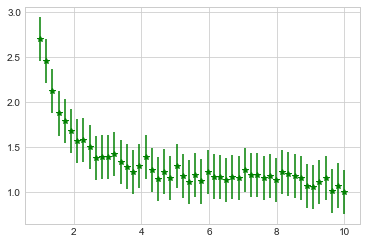

In [111]:
dy= 0.245
plt.errorbar(df['Radio [nm]'], df['Tiempo [s]'], yerr=dy, fmt='*', color='green');

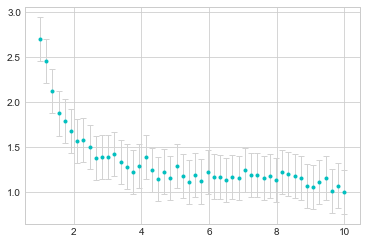

In [116]:
plt.errorbar(df['Radio [nm]'],df['Tiempo [s]'], yerr=dy, fmt='.',color='c',
            ecolor='lightgray',elinewidth=1, capsize=3);

## Ejercicio

Vamos a practicar un poco estos conceptos sobre el DataFrame de futbolistas, "FIFA20.csv":
1. Lee el DataFrame y elimina todos aquellos registros con algún nulo
2. Crea un par de columnas nuevas en función de 'dob', que te devuelvan el año y el mes. Llámalas "year" y "month"
3. Crea un gráfico de contorno simple (con líneas de color negro) que muestre la media del salario de cada futbolista ("wage_eur") en función del año y del mes de nacimiento. Para ello, tendremos que obtener primero un DataFrame que nos devuelva estos datos, para lo cual hemos visto más de una forma en notebooks pasados. Una vez tengamos ese DataFrame, podremos utilizar el índice como eje Y y las columnas como eje X para crear nuestra representación.
4. En base a lo que has hecho en el apartado 3, créate ahora un gráfico de contorno pero con relleno. Usa el cmap "viridis".
5. Investiga diferentes valores de cmap (en el notebook te dice cómo puedes encontrar más valores posibles) y prueba con un par de mapas de color que no hayamos visto en clase
6. Finalmente, crea un gráfico como el anterior (con el colormap que más te haya gustado) pero con una interpolación gaussiana para que no haya desniveles tan abruptos, con un factor de transparencia de 0.8 y haz que se muestren los contornos con un tamaño de letra de 10

In [140]:
import pandas as pd
import numpy as np

In [126]:
df = pd.read_csv("FIFA20.csv")

df['year'] = df['dob'].apply(lambda x: int(x[:4]))
df['month'] = df['dob'].apply(lambda x: int(x[5:7]))


df.head()

,short_name,long_name,dob,club,overall,potential,value_eur,wage_eur,team_position,preferred_foot,influencer,year,month
0,L. Messi,Lionel Andrés Messi Cuccittini,1987-06-24,FC Barcelona,94,94,95500000,565000,RW,Left,True,1987,6
1,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,1985-02-05,Juventus,93,93,58500000,405000,LW,Right,True,1985,2
2,Neymar Jr,Neymar da Silva Santos Junior,1992-02-05,Paris Saint-Germain,92,92,105500000,290000,CAM,Right,True,1992,2
3,J. Oblak,Jan Oblak,1993-01-07,Atlético Madrid,91,93,77500000,125000,GK,Right,False,1993,1
4,E. Hazard,Eden Hazard,1991-01-07,Real Madrid,91,91,90000000,470000,LW,Right,True,1991,1


In [136]:
df1 = df.pivot_table('wage_eur', index='year', columns='month')
df1 = df1.fillna(0)
df1

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
1977,5000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1000.000000,0.000000,21000.000000,0.000000,0.000000,0.000000
1978,29500.000000,0.000000,0.000000,0.000000,0.000000,5000.000000,2000.000000,0.000000,0.000000,20000.000000,0.000000,3000.000000
1979,1000.000000,1000.000000,2000.000000,4000.000000,3500.000000,2500.000000,3000.000000,1000.000000,0.000000,1000.000000,0.000000,500.000000
1980,7000.000000,9000.000000,0.000000,1500.000000,1000.000000,2250.000000,16000.000000,8333.333333,1000.000000,2666.666667,0.000000,4000.000000
1981,6800.000000,14000.000000,2500.000000,2333.333333,3571.428571,4500.000000,5666.666667,2400.000000,6857.142857,3000.000000,8500.000000,6000.000000
1982,8571.428571,6857.142857,9000.000000,5833.333333,3076.923077,4000.000000,2666.666667,5428.571429,9100.000000,7500.000000,4666.666667,6333.333333
1983,6733.333333,6400.000000,6846.153846,9866.666667,3333.333333,4600.000000,7100.000000,3615.384615,11071.428571,7357.142857,4357.142857,5100.000000
1984,9571.428571,8063.492063,4333.333333,6318.181818,6611.111111,8913.043478,12428.571429,18565.217391,12400.000000,7272.727273,6400.000000,12545.454545
1985,12775.000000,22689.655172,8636.363636,11461.538462,17720.000000,10800.000000,14105.263158,12814.814815,17325.000000,7486.486486,9240.000000,8730.769231


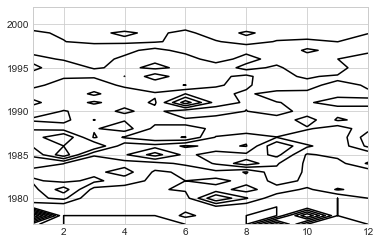

In [137]:
x = df1.columns
y = df1.index
Z = df1.values


plt.contour(x, y, Z, colors='black');

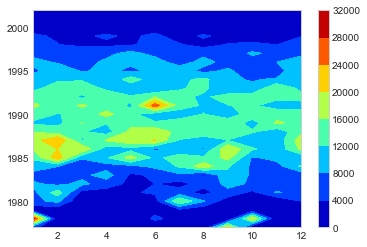

In [145]:
plt.contourf(x, y, Z, cmap=plt.cm.jet)
plt.colorbar();

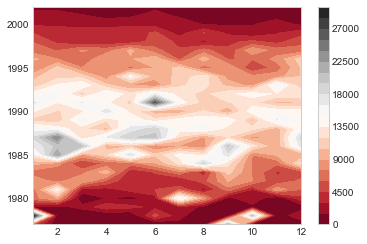

In [156]:
plt.contourf(x, y, Z, levels=20, cmap='RdGy')
plt.colorbar();

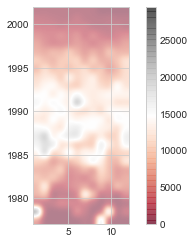

In [154]:
# contours = plt.contour(x, y, Z, 2, colors='black')
# plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z, extent=[min(x), max(x), min(y), max(y)], origin='lower',
           cmap='RdGy', alpha=0.5, interpolation='gaussian')
plt.colorbar();

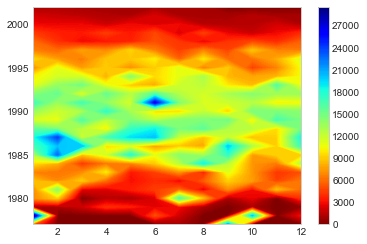

In [161]:
plt.contourf(x, y, Z, levels = 200, cmap=plt.cm.jet_r)
plt.colorbar();